# Welcome to Kogi Interactive Notebook

In [1]:
# Interactive Goal Model Evaluation - Jupyter Notebook
# Run each cell sequentially to set up the interactive environment

# Cell 1: Setup and Imports
import json
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
import networkx as nx
import numpy as np
from enum import Enum
from typing import Dict, List, Tuple, Set
import pandas as pd
from Implementation.enums import ElementStatus, QualityStatus, LinkType, LinkStatus
# from Implementation.goal_model import GoalModel # Old semantics
from NewSemantics.goal_model import GoalModel # New Semantics from the paper
from NewSemantics.istar_processor import read_istar_model
from Ui.Layout import Layout

In [2]:
# Add your Implementation directory to the path
# Adjust this path to match your project structure
# Cell 2: Configure Paths

import os
import sys
project_root = os.path.abspath(".")  # Current directory
implementation_path = os.path.join(project_root, "Implementation")
app_path = os.path.join(project_root, "App")

# Add paths to sys.path so we can import your modules
if implementation_path not in sys.path:
    sys.path.append(implementation_path)
if app_path not in sys.path:
    sys.path.append(app_path)

print(f"Project root: {project_root}")
print(f"Implementation path: {implementation_path}")
print(f"App path: {app_path}")
print("Paths configured!")


Project root: /Users/huba/git/dtu_projects/juanita
Implementation path: /Users/huba/git/dtu_projects/juanita/Implementation
App path: /Users/huba/git/dtu_projects/juanita/App
Paths configured!


In [3]:
# # Cell 3: Import Your Existing Code
# try:
#     # Import your enums
#     from enums import ElementStatus, QualityStatus, LinkType, LinkStatus
#     print(" Enums imported successfully")
    
#     # Import your GoalModel class
#     from goal_model import GoalModel
#     print(" GoalModel imported successfully")
    
#     # Try to import the main app logic (adjust the import based on your file structure)
#     # If you have the main evaluation logic in a separate file, import it here
#     try:
#         import trace_analyzer  # Adjust this to your actual file name
#         print(" Main evaluation module imported")
#     except ImportError:
#         print(" Main evaluation module not found - will use direct GoalModel")
    
# except ImportError as e:
#     print(f" Import error: {e}")
#     print(" Please ensure your files are in the correct directory structure:")
#     print("   - Implementation/enums.py")
#     print("   - Implementation/goal_model.py")
#     print("   - App/main_evaluation.py (or similar)")
#     raise

# print(" All imports successful!")

In [4]:
# CELL 4 - Model Creation Function
def create_model_from_your_code():
    """Create the goal model using your existing create_model function logic"""
    model = GoalModel()
    
    # Add tasks
    tasks = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8"]
    for task in tasks:
        model.add_task(task)
    
    # Add goals
    goals = ["G1", "G2", "G3"]
    for goal in goals:
        model.add_goal(goal)
    
    # Add quality
    model.add_quality("Q1")
    
    # Add links (from your code)
    model.add_link("G3", "T8", LinkType.AND)
    model.add_link("T1", "T6", LinkType.AND)
    model.add_link("G1", "T2", LinkType.OR)
    model.add_link("Q1", "G2", LinkType.BREAK)
    model.add_link("Q1", "G1", LinkType.MAKE)
    model.add_link("G1", "T1", LinkType.OR)
    model.add_link("G3", "T1", LinkType.AND)
    model.add_link("T1", "T7", LinkType.AND)
    model.add_link("G2", "T3", LinkType.AND)
    model.add_link("G2", "T5", LinkType.AND)
    model.add_link("G2", "T4", LinkType.AND)
    
    # Add requirements
    model.requirements = {
        "G3": [['T8', 'T1']],
        "T1": [['T6', 'T7']],
        "G1": [['T2'], ['T1']],
        "G2": [['T3', 'T5', 'T4']]
    }
    
    # Add event mappings
    events = {
        "e1": "T1",
        "e2": "T2",
        "e3": [["T3"]],
        "e4": "T4",
        "e5": "T5",
        "e6": "T6",
        "e7": "T7",
        "e8": "T8"
    }
    for event, target in events.items():
        model.add_event_mapping(event, target)
    
    print("✓ Model created using your existing logic!")
    return model

# Create model instance
model = create_model_from_your_code()

✓ Model created using your existing logic!


In [5]:
# CELL 4 - Model Creation Function
# This overrides the previos definition of the method
def create_model_from_your_code():
    filepath = "Data/example_from_paper.txt"
    print(f"✓ Model created using istar file {filepath}!")
    print("Press on 'reset model' to replace the previous model")
    return read_istar_model(filepath)


# Create model instance
model = create_model_from_your_code()

✓ Model created using istar file Data/example_from_paper.txt!
Press on 'reset model' to replace the previous model


In [6]:
# Cell 5: Visualization Functions (adapted to work with your GoalModel)

def get_status_color_from_your_model(element_id):
    """Get color based on element status using your model's data structures"""
    if element_id in model.qualities:
        status = model.qualities[element_id]
        if status == QualityStatus.UNKNOWN:
            return 'white'
        elif status == QualityStatus.FULFILLED:
            return 'lightgreen'
        elif status == QualityStatus.DENIED:
            return 'lightcoral'
    else:
        status = model.tasks.get(element_id) or model.goals.get(element_id)
        if status == ElementStatus.UNKNOWN:
            return 'white'
        elif status == ElementStatus.TRUE_FALSE:
            return 'lightgreen'
        elif status == ElementStatus.TRUE_TRUE:
            return 'lightblue'
    return 'white'

def create_goal_model_visualization():
    """Create visualization using your actual GoalModel data"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Left side: Goal Model Structure
    ax1.set_title("Goal Model Structure", fontsize=14, fontweight='bold')
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 10)
    ax1.set_aspect('equal')
    
    # Define positions for elements
    positions = model.positions
    
    # Draw elements using your model's actual data
    for element_id, (x, y) in positions.items():
        color = get_status_color_from_your_model(element_id)
        
        if element_id.startswith('Q'):
            # Quality - cloud shape
            cloud = FancyBboxPatch((x-0.4, y-0.3), 0.8, 0.6, 
                                 boxstyle="round,pad=0.1", 
                                 facecolor=color, edgecolor='black', linewidth=2)
            ax1.add_patch(cloud)
            # Show actual status from your model
            status_text = f"{element_id}\n{model._format_status(model.qualities[element_id])}"
            ax1.text(x, y, status_text, ha='center', va='center', fontweight='bold', fontsize=8)
        elif element_id.startswith('G'):
            # Goal - ellipse
            ellipse = patches.Ellipse((x, y), 0.8, 0.5, 
                                    facecolor=color, edgecolor='black', linewidth=2)
            ax1.add_patch(ellipse)
            status_text = f"{element_id}\n{model._format_status(model.goals[element_id])}"
            ax1.text(x, y, status_text, ha='center', va='center', fontweight='bold', fontsize=8)
        else:
            # Task - hexagon
            hexagon = shapes.RegularPolygon((x, y), 6, radius=0.4, 
                                          facecolor=color, edgecolor='black', linewidth=2)
            ax1.add_patch(hexagon)
            status_text = f"{element_id}\n{model._format_status(model.tasks[element_id])}"
            ax1.text(x, y, status_text, ha='center', va='center', fontweight='bold', fontsize=8)
    
    # Draw links using your model's actual links
    for parent, child, link_type, status in model.links:
        if parent in positions and child in positions:
            px, py = positions[parent]
            cx, cy = positions[child]
            
            # Determine arrow style based on link type from your enums
            if link_type == LinkType.MAKE:
                color = 'green'
                style = '->'
            elif link_type == LinkType.BREAK:
                color = 'red'
                style = '->'
            elif link_type == LinkType.AND:
                        arrow_color = 'purple'
                        style = '->'
            elif link_type == LinkType.OR:
                        arrow_color = 'orange'
                        style = '->'
            else:
                color = 'blue'
                style = '->'
            
            ax1.annotate('', xy=(cx, cy), xytext=(px, py),
                        arrowprops=dict(arrowstyle=style, color=color, lw=2))
    
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # Right side: Process Model with Mappings (using your event_mapping)
    ax2.set_title("Process Model & Event Mappings", fontsize=14, fontweight='bold')
    ax2.set_xlim(0, 10)
    ax2.set_ylim(0, 10)
    
    # Draw process transitions using your actual event mappings
    events = list(model.event_mapping.keys())
    for i, event in enumerate(events):
        x_pos = (i + 1) * (8 / len(events)) + 1
        y_level = 5
        
        # Process transition as rectangle
        rect = FancyBboxPatch((x_pos-0.3, y_level-0.2), 0.6, 0.4,
                            boxstyle="round,pad=0.05",
                            facecolor='lightgray', edgecolor='black')
        ax2.add_patch(rect)
        ax2.text(x_pos, y_level, event, ha='center', va='center', fontweight='bold')
        
        # Show mapping using your actual event_mapping data
        targets = model.event_mapping[event]
        if isinstance(targets[0], list):
            target_str = ', '.join(targets[0])
        else:
            target_str = targets[0][0] if isinstance(targets[0], list) else str(targets[0])
        
        ax2.text(x_pos, y_level-0.8, f"→ {target_str}", 
                ha='center', va='center', fontsize=8)
    
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    plt.tight_layout()
    return fig

print("Visualization functions ready!")

Visualization functions ready!


Interactive controls created using your GoalModel!


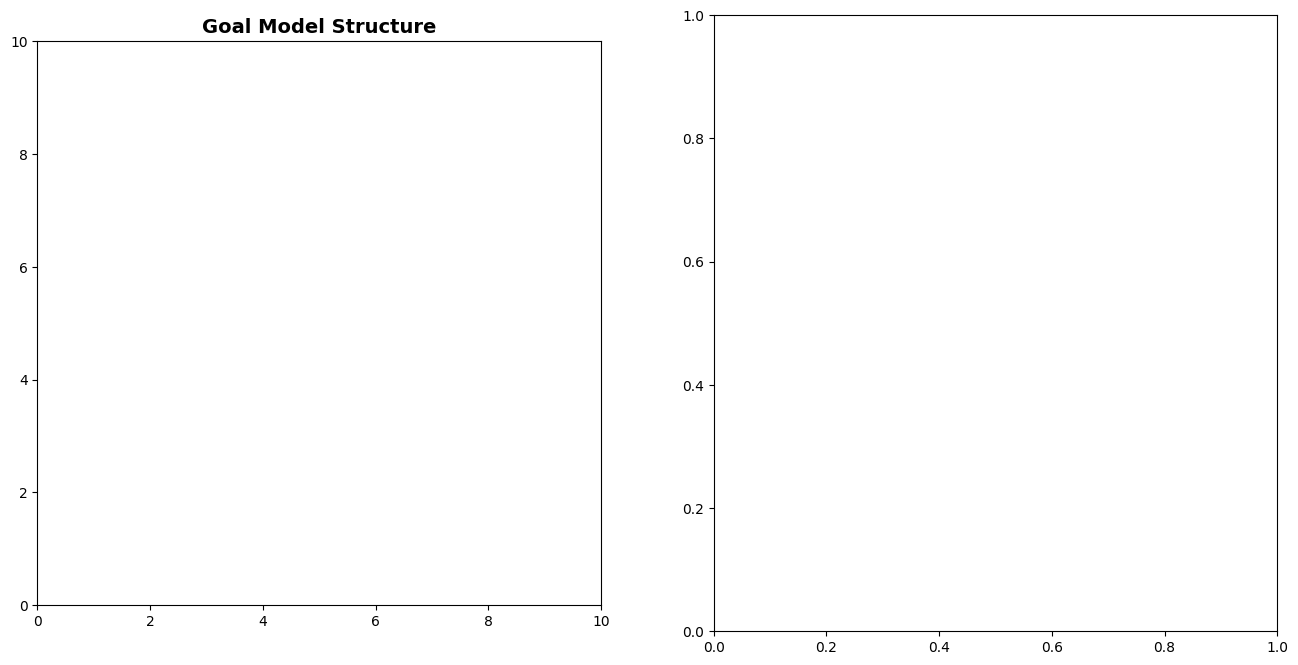

In [7]:
# Cell 6: Interactive Controls 

def create_interactive_controls():
    """Create interactive controls that use your GoalModel's process_event method"""
    
    # Process transition dropdown using your actual event mappings
    process_dropdown = widgets.Dropdown(
        options=list(model.event_mapping.keys()),
        value=list(model.event_mapping.keys())[0],
        description='Event:',
        disabled=False,
    )
    
    # Execute button
    execute_button = widgets.Button(
        description='Execute Event',
        disabled=False,
        button_style='success',
        tooltip='Execute the selected event using your process_event method'
    )
    
    # Reset button
    reset_button = widgets.Button(
        description='Reset Model',
        disabled=False,
        button_style='warning',
        tooltip='Reset the model to initial state'
    )
    
    # Output areas
    trace_output = widgets.Output()
    status_output = widgets.Output()
    viz_output = widgets.Output()
    
    def execute_event(b):
        """Execute selected event using your GoalModel's process_event method"""
        with status_output:
            clear_output(wait=True)
            selected_event = process_dropdown.value
            
            print(f"Executing event: {selected_event}")
            
            # Use your actual process_event method
            model.process_event(selected_event)
            
            print(f"Event {selected_event} processed successfully")
            
            # Show current quality status using your model's data
            print("\nCurrent Status:")
            for quality_id, status in model.qualities.items():
                formatted_status = model._format_status(status)
                print(f"  {quality_id}: {formatted_status}")
        
        update_trace_display()
        update_visualization()
    
    def reset_model(b):
        """Reset the model using your create_model logic"""
        global model
        model = create_model_from_your_code()
        
        with status_output:
            clear_output(wait=True)
            print("Model reset to initial state")
        
        with trace_output:
            clear_output(wait=True)
            print("Event sequence: []")
        
        update_visualization()
    
    def update_trace_display():
        """Update the trace display"""
        with trace_output:
            clear_output(wait=True)
            # You can access execution history through your model if available
            # For now, we'll show the current state
            print("Current Model State:")
            print(f"Execution counts: {model.execution_count}")
    
    def update_visualization():
        """Update the visualization using your model data"""
        with viz_output:
            clear_output(wait=True)
            fig = create_goal_model_visualization()
            plt.show()
            plt.close()
    
    # Connect event handlers
    execute_button.on_click(execute_event)
    reset_button.on_click(reset_model)
    
    # Create layout
    controls = widgets.HBox([process_dropdown, execute_button, reset_button])
    
    # Initial displays
    update_trace_display()
    update_visualization()
    
    return controls, trace_output, status_output, viz_output

# Create and display controls
controls, trace_out, status_out, viz_out = create_interactive_controls()
print("Interactive controls created using your GoalModel!")

In [8]:
# Cell 7: Trace and Evolution Visualization Functions

def create_trace_visualization():
    """Create horizontal trace timeline showing only events"""
    trace_output = widgets.Output()
    
    # Global variable to track executed events
    if not hasattr(create_trace_visualization, 'executed_events'):
        create_trace_visualization.executed_events = []
    
    def update_trace_display():
        with trace_output:
            clear_output(wait=True)
            
            # Create horizontal trace timeline
            trace_html = """
            <div style='border: 2px solid #ccc; padding: 15px; margin: 10px; background-color: #f9f9f9;'>
                <h3>Trace Execution Timeline</h3>
            """
            
            if not create_trace_visualization.executed_events:
                trace_html += "<p>No events executed yet. Select an event and click 'Execute Event' to start.</p>"
            else:
                # Create horizontal event sequence
                trace_html += "<div style='display: flex; align-items: center; gap: 10px; font-size: 18px; font-weight: bold;'>"
                trace_html += "<span style='color: #666;'>trace ⟨</span>"
                
                for i, event in enumerate(create_trace_visualization.executed_events):
                    if i > 0:
                        trace_html += "<span style='color: #666;'>,</span>"
                    trace_html += f"<span style='color: #2E86AB; margin: 0 5px;'>{event}</span>"
                
                trace_html += "<span style='color: #666;'>⟩</span>"
                trace_html += "</div>"
            
            trace_html += "</div>"
            display(HTML(trace_html))
    
    return trace_output, update_trace_display


def create_evolution_visualization():
    """Create evolution view with proper mapping visualization"""
    evolution_out = widgets.Output()
    
    def update_evolution():
        with evolution_out:
            clear_output(wait=True)
            
            # Get executed events
            executed_events = getattr(create_trace_visualization, 'executed_events', [])
            
            # Build mapping from events to elements
            event_to_element_mapping = {}
            
            # Try to get mappings from your model
            try:
                if hasattr(model, 'events') and hasattr(model, 'get_mapping'):
                    for event in model.events:
                        mapped_element = model.get_mapping(event)
                        if mapped_element:
                            event_to_element_mapping[event] = mapped_element
                else:
                    # Fallback: define mappings based on your model structure
                    event_to_element_mapping = {
                        'e1': 'T1', 'e2': 'T2', 'e3': 'T3', 'e4': 'T4',
                        'e5': 'T5', 'e6': 'T6', 'e7': 'T7', 'e8': 'T8'
                    }
            except:
                # Default mappings if model access fails
                event_to_element_mapping = {
                    'e1': 'T1', 'e2': 'T2', 'e3': 'T3', 'e4': 'T4',
                    'e5': 'T5', 'e6': 'T6', 'e7': 'T7', 'e8': 'T8'
                }
            
            # Get which elements should be highlighted
            highlighted_elements = set()
            for executed_event in executed_events:
                if executed_event in event_to_element_mapping:
                    highlighted_elements.add(event_to_element_mapping[executed_event])
            
            # Display the evolution view
            display(HTML(f"""
            <div style='background-color: #2d2d2d; padding: 20px; border-radius: 8px; font-family: "Segoe UI", Arial, sans-serif;'>
                <div style='text-align: center; margin-bottom: 20px;'>
                    <div style='background-color: #404040; color: #ffffff; padding: 10px; border-radius: 4px; display: inline-block; min-width: 100px;'>
                        {executed_events[-1] if executed_events else 'Initial State'}
                    </div>
                    <div style='color: #b0b0b0; margin-top: 8px; font-size: 12px;'>Current Event</div>
                </div>
                
                <div style='display: flex; justify-content: space-between; max-width: 400px; margin: 0 auto;'>
                    <div style='text-align: center;'>
                        <div style='color: #ffffff; font-weight: 600; margin-bottom: 15px;'>Process</div>
                        {''.join([
                            f'<div style="background-color: {"#28a745" if event in executed_events else "#404040"}; '
                            f'color: #ffffff; padding: 8px 12px; margin: 5px 0; border-radius: 4px; '
                            f'border: {"2px solid #ffffff" if event == (executed_events[-1] if executed_events else None) else "1px solid #666"};">'
                            f'{event}</div>'
                            for event in ['e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8']
                        ])}
                    </div>
                    
                    <div style='display: flex; align-items: center; margin: 0 20px;'>
                        <div style='color: #4a90e2; font-size: 24px;'>→</div>
                    </div>
                    
                    <div style='text-align: center;'>
                        <div style='color: #ffffff; font-weight: 600; margin-bottom: 15px;'>Elements</div>
                        {''.join([
                            f'<div style="background-color: {"#28a745" if element in highlighted_elements else "#6c757d"}; '
                            f'color: #ffffff; padding: 8px 12px; margin: 5px 0; border-radius: 4px; '
                            f'border: 1px solid #666;">{element}</div>'
                            for element in ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8']
                        ])}
                        {''.join([
                            f'<div style="background-color: #6c757d; color: #ffffff; padding: 8px 12px; '
                            f'margin: 5px 0; border-radius: 50%; border: 1px solid #666;">{goal}</div>'
                            for goal in ['G1', 'G2', 'G3', 'Q1']
                        ])}
                    </div>
                </div>
                
                <div style='text-align: center; margin-top: 20px; color: #b0b0b0; font-size: 12px;'>
                    {'Mapping: ' + ', '.join([f"{k} → {v}" for k, v in event_to_element_mapping.items() if k in executed_events]) if executed_events else 'No mappings executed'}
                </div>
            </div>
            """))
    
    return evolution_out, update_evolution


def create_dual_model_visualization():
    """Create side-by-side goal model and process model visualization"""
    viz_output = widgets.Output()
    
    def update_dual_visualization():
        with viz_output:
            clear_output(wait=True)
            
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))
            
            # Left side: Goal Model
            ax1.set_title("Goal Model Structure", fontsize=16, fontweight='bold', pad=20)
            layout = Layout(model)
            ax1.set_xlim(0, layout.max[0])
            ax1.set_ylim(0, layout.max[1])
            ax1.set_aspect('equal')
            
            fontsize=10
            
            # Define positions for goal model elements
        
            positions = layout.positions
            
            # Draw goal model elements
            shapes = {}
            for element_id, (x, y) in positions.items():
                color = get_status_color_from_your_model(element_id)
                
                if model._get_element_type(element_id) == "Quality":
                    # Quality - cloud shape
                    cloud = FancyBboxPatch((x-0.6, y-0.4), 1.2, 0.8, 
                                         boxstyle="roundtooth, pad=0.6, tooth_size=0.5", 
                                         facecolor=color, edgecolor='black', linewidth=2)
                    ax1.add_patch(cloud)
                    shapes.update({element_id:cloud})
                    status_text = f"{element_id}\n{model._format_status(model.qualities[element_id])}"
                    ax1.text(x, y, status_text, ha='center', va='center', fontweight='bold', fontsize=fontsize,  zorder=10)
                elif model._get_element_type(element_id) == "Goal":
                    # Goal - ellipse
                    ellipse = patches.Ellipse((x, y), 1.0, 0.6, 
                                            facecolor=color, edgecolor='black', linewidth=2)
                    ax1.add_patch(ellipse)
                    shapes.update({element_id:ellipse})
                    status_text = f"{element_id}\n{model._format_status(model.goals[element_id])}"
                    ax1.text(x, y, status_text, ha='center', va='center', fontweight='bold', fontsize=fontsize)
                else:
                    # Task - hexagon
                    hexagon = patches.RegularPolygon((x, y), 6, radius=0.5, 
                                                  facecolor=color, edgecolor='black', linewidth=2)
                    ax1.add_patch(hexagon)
                    shapes.update({element_id:hexagon})
                    status_text = f"{element_id}\n{model._format_status(model.tasks[element_id])}"
                    ax1.text(x, y, status_text, ha='center', va='center', fontweight='bold', fontsize=fontsize)
                            
            # Draw links in goal model
            for parent, child, link_type, _ in model.links:
                shrink = 2
                if link_type == LinkType.MAKE:
                        arrow_color = 'green'
                        style = '->'
                elif link_type == LinkType.BREAK:
                        arrow_color = 'red'
                        style = '->'
                elif link_type == LinkType.AND:
                        arrow_color = 'purple'
                        style = '|-|,widthA=0,widthB=0.5'
                        shrink = 20
                elif link_type == LinkType.OR:
                        arrow_color = 'orange'
                        style = '->'
                else:
                        arrow_color = 'blue'
                        style = '->'
                        
                # arrow_style = style+",head_length=0.4,head_width=0.2,widthA=1.0,widthB=1.0,lengthA=0.2,lengthB=0.2,angleA=0,angleB=0"
                # print(arrow_style)
                connector_arrow = patches.FancyArrowPatch(
                                        posA=positions[child],
                                        posB=positions[parent],
                                        patchA=shapes[child], 
                                        patchB=shapes[parent],
                                        arrowstyle=style,
                                        color=arrow_color,
                                        linewidth=4,
                                        shrinkB=shrink,
                                        mutation_scale=20
                                        )
                                        
                ax1.add_patch(connector_arrow)
            
            ax1.set_xticks([])
            ax1.set_yticks([])
            ax1.grid(True, alpha=0.3)
            
            # Right side: Process Model
            ax2.set_title("Process Model & Event Mappings", fontsize=16, fontweight='bold', pad=20)
            ax2.set_xlim(0, 10)
            ax2.set_ylim(0, 12)
            
            # Draw process model as a sequence
            events = list(model.event_mapping.keys())
            y_positions = [10, 8.5, 7, 5.5, 4, 2.5, 1, 0.5]  # Different heights for visual appeal
            
            for i, event in enumerate(events):
                if i < len(y_positions):
                    x_pos = 2
                    y_pos = y_positions[i]
                    
                    # Process transition as rectangle
                    rect = FancyBboxPatch((x_pos-0.4, y_pos-0.25), 0.8, 0.5,
                                        boxstyle="round,pad=0.05",
                                        facecolor='lightgray', edgecolor='black', linewidth=2)
                    ax2.add_patch(rect)
                    ax2.text(x_pos, y_pos, event, ha='center', va='center', fontweight='bold', fontsize=12)
                    
                    # Show mapping with arrow
                    targets = model.event_mapping[event]
                    if isinstance(targets[0], list):
                        target_str = ', '.join(targets[0])
                    else:
                        target_str = targets[0][0] if isinstance(targets[0], list) else str(targets[0])
                    
                    # Arrow pointing to mapping
                    ax2.annotate('', xy=(x_pos + 1.5, y_pos), xytext=(x_pos + 0.5, y_pos),
                                arrowprops=dict(arrowstyle='->', color='black', lw=2))
                    
                    # Target box
                    target_rect = FancyBboxPatch((x_pos + 1.5, y_pos-0.2), 2.5, 0.4,
                                               boxstyle="round,pad=0.05",
                                               facecolor='lightyellow', edgecolor='gray')
                    ax2.add_patch(target_rect)
                    ax2.text(x_pos + 2.75, y_pos, target_str, ha='center', va='center', fontsize=10)
            
            ax2.set_xticks([])
            ax2.set_yticks([])
            ax2.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            plt.close()
    
    return viz_output, update_dual_visualization

print("Trace and Evolution visualization functions ready!")
print("Functions created:")
print("- create_trace_visualization(): Horizontal timeline display")
print("- create_evolution_visualization(): Event-to-element mapping visualization")  
print("- create_dual_model_visualization(): Side-by-side goal and process models")

Trace and Evolution visualization functions ready!
Functions created:
- create_trace_visualization(): Horizontal timeline display
- create_evolution_visualization(): Event-to-element mapping visualization
- create_dual_model_visualization(): Side-by-side goal and process models


# Progresive view of the traces

In [9]:
# CELL 8 - Display Complete Interface
print("🚀 FIXED Goal Model Evaluation Framework")
print("✅ Evolution Analysis: Progressive columns for each event")  
print("✅ Model State Comparison: Correct layout matching green figure")
print("✅ All components ready for use")

# # Display interface
# display(widgets.VBox([
#     widgets.HTML("<h2 style='text-align: center; color: #2E86AB;'>Fixed Goal Model Interface</h2>"),
#     controls,
#     status_out,
#     widgets.HTML("<h3>Execution Trace:</h3>"),
#     trace_out,
#     widgets.HTML("<h3>Evolution Analysis (FIXED - Progressive Columns):</h3>"),
#     evolution_out,
#     widgets.HTML("<h3>Model State Comparison (FIXED - Correct Layout):</h3>"),
#     dual_viz_out
# ]))

🚀 FIXED Goal Model Evaluation Framework
✅ Evolution Analysis: Progressive columns for each event
✅ Model State Comparison: Correct layout matching green figure
✅ All components ready for use


In [ ]:
# Cell 8: Main Interface with New Layout
def display_interface():
    """Display the interface with trace timeline and dual model view"""
    
    # Header
    header = widgets.HTML(f"""
    <div style='text-align: center; margin-bottom: 20px;'>
        <h1 style='color: #2E86AB; margin-bottom: 10px;'> A unified view - Interactive High-Level Business Requirements Evaluation</h1>
        <p style='font-size: 14px; color: #666;'>Using your actual GoalModel class from: {implementation_path}</p>
    </div>
    """)
    
    # Legend - more compact
    legend = widgets.HTML("""
    <div style='background-color: #f0f0f0; padding: 10px; border-radius: 5px; margin-bottom: 15px; font-size: 12px; border: 1px solid #ccc;'>
    <div style='font-weight: bold; margin-bottom: 8px; text-align: center;'>Conventions</div>
    <div><strong>Colors:</strong> 🤍 Unknown | 🟢 Satisfied/Fulfilled | 🔵 Executed Pending | 🔴 Denied</div>
    <div><strong>Shapes:</strong> ☁️ Quality | ⭕ Goal | ⬡ Task | ⬜ Process Transition</div>
    </div>
    """)
    
    # Controls section
    controls_section = widgets.VBox([
        widgets.HTML("<h3>Controls</h3>"),
        controls,
        status_out
    ])
    
    # Create trace and dual visualization
    trace_out_new, update_trace = create_trace_visualization()
    evolution_out, update_evolution = create_evolution_visualization()
    dual_viz_out, update_dual_viz = create_dual_model_visualization()
    
    # Modified execute function to update all displays
    def execute_event_with_trace(b):
        """Execute event and update all displays"""
        selected_event = controls.children[0].value  # Get dropdown value
        
        with status_out:
            clear_output(wait=True)
            print(f"🚀 Executing event: {selected_event}")
            
            # Add to trace
            create_trace_visualization.executed_events.append(selected_event)
            
            # Use your actual process_event method
            model.process_event(selected_event)
            
            print(f"✅ Event {selected_event} processed!")
            
            # Show current quality status
            print("\n📊 Current Status:")
            for quality_id, status in model.qualities.items():
                formatted_status = model._format_status(status)
                print(f"🎯 {quality_id}: {formatted_status}")
        
        # Update all displays
        update_trace()
        update_evolution()
        update_dual_viz()
    
    def reset_model_with_trace(b):
        """Reset model and clear trace"""
        global model
        model = create_model_from_your_code()
        create_trace_visualization.executed_events = []
        
        with status_out:
            clear_output(wait=True)
            print("🔄 Model and trace reset to initial state")
        
        update_trace()
        update_evolution()
        update_dual_viz()
    
    # Clear any existing event handlers to prevent duplicates
    controls.children[1]._click_handlers.callbacks.clear()  # Execute button
    controls.children[2]._click_handlers.callbacks.clear()  # Reset button
    
    # Connect new event handlers
    controls.children[1].on_click(execute_event_with_trace)  # Execute button
    controls.children[2].on_click(reset_model_with_trace)    # Reset button
    
    # Create main tab structure
    main_tab = widgets.Tab()
    
    # Main tab content with trace timeline, evolution view, and dual models
    main_content = widgets.VBox([
        controls_section,
        trace_out_new,
        widgets.HTML("<h3>Evolution View</h3>"),
        evolution_out,
        widgets.HTML("<h3>Model Views</h3>"),
        dual_viz_out
    ])
    
    # Statistics tab (simplified)
    # stats_content = create_statistics_view()
    
    # main_tab.children = [main_content, stats_content]
    main_tab.children = [main_content]
    main_tab.set_title(0, 'Main Interface')
    # main_tab.set_title(1, 'Statistics')
    
    # Initial visualization
    update_trace()
    update_evolution()
    update_dual_viz()
    
    # Complete interface
    interface = widgets.VBox([
        header,
        legend,
        main_tab
    ])
    
    return interface

# Display the complete interface
interface = display_interface()
display(interface)

print("🚀 Interactive interface ready!")
print("💡 This notebook uses your actual code files:")
print(f"   - {implementation_path}/enums.py")
print(f"   - {implementation_path}/goal_model.py")
print("👆 Use the interface above to interact with your GoalModel!")

🚀 Interactive interface ready!
💡 This notebook uses your actual code files:
   - /Users/huba/git/dtu_projects/juanita/Implementation/enums.py
   - /Users/huba/git/dtu_projects/juanita/Implementation/goal_model.py
👆 Use the interface above to interact with your GoalModel!
